In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import matplotlib as mpl
from pandas.core.reshape.pivot import pivot
from pandas.io.json import json_normalize
corona=pd.read_excel('corona.xlsx')
confirmed_cases = pd.read_csv('time_series_covid_19_confirmed.csv')
deaths_reported = pd.read_csv('time_series_covid_19_deaths.csv')
recovered_cases=pd.read_csv('time_series_covid_19_recovered.csv')

#### Graph Based COVID19 in India's state

<ipython-input-46-7f5a271518c9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid191['confirmed']=covid191['confirmed'].astype(int)
<ipython-input-46-7f5a271518c9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  st.drop_duplicates(subset='State code', keep = "first", inplace=True)


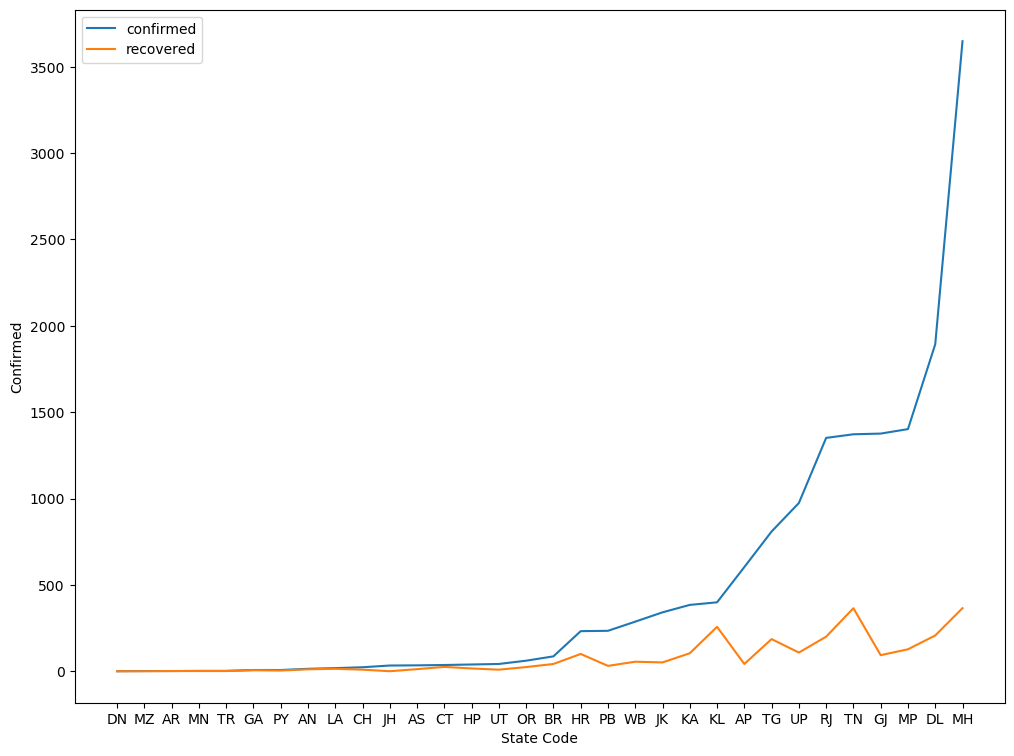

In [46]:
URL = "https://api.covid19india.org/data.json"
data = requests.get(url=URL).json()
covid19_df = pd.json_normalize(data['statewise'])
covid19=covid19_df[['state','confirmed','active','recovered','deaths']].sort_values("confirmed", ascending=False)
covid191=covid19[['state','confirmed','recovered','deaths']]
covid191['confirmed']=covid191['confirmed'].astype(int)
covid191=covid191.sort_values('confirmed',ascending=True)
st=corona[['Detected State','State code']]
st.drop_duplicates(subset='State code', keep = "first", inplace=True) 
st=st.rename(columns={'Detected State': 'state'}, errors="raise")
covid191 = pd.merge(left=covid191,right=st , left_on=covid191['state'], right_on=st['state'])
mpl.style.use('default')
covid191['recovered']=covid191['recovered'].astype('int')
plt.figure(figsize=(12, 9))
plt.xlabel("State Code")
plt.ylabel("Confirmed")
plt.plot(covid191['State code'],covid191['confirmed'],label='confirmed')
plt.plot(covid191['State code'],covid191['recovered'],label='recovered')
plt.legend()

### Graph based on COVID19 all over the world by Date

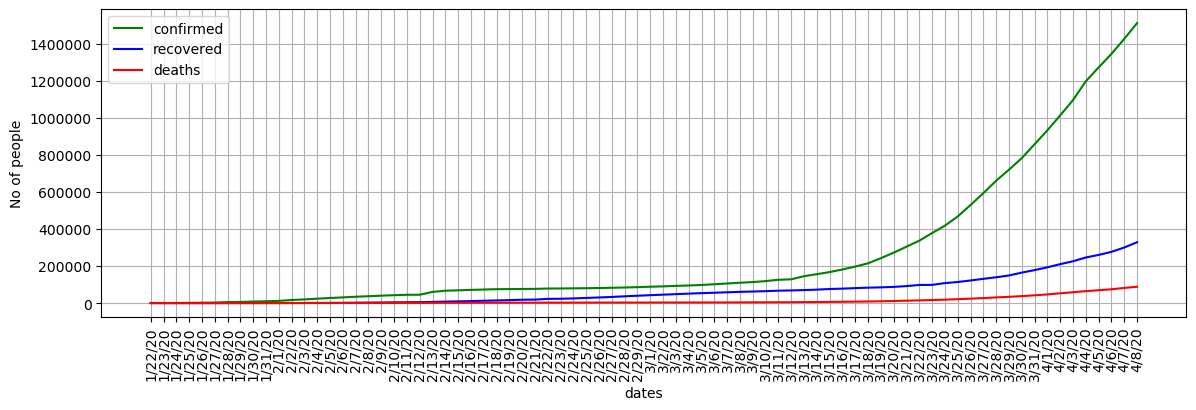

In [31]:
confirmed_cases_dates = confirmed_cases.iloc[:,4:].sum()

deaths_reported_dates = deaths_reported.iloc[:,4:].sum()

recovered_cases_dates = recovered_cases.iloc[:,4:].sum()

plt.figure(figsize=(14,4))
plt.xticks(range(len(deaths_reported_dates)), deaths_reported_dates.index, rotation=90)
plt.xlabel("dates")
plt.ylabel("No of people")
plt.plot(confirmed_cases_dates,label="confirmed",color="green")
plt.plot(recovered_cases_dates,label="recovered",color="blue")
plt.plot(deaths_reported_dates,label="deaths",color='red')
plt.grid()
plt.legend()

### Graph on number of males and females in each state in INDIA

In [87]:
gen_F=corona[['State code','Gender']][(corona['Gender']=="F")&(corona['Current Status']=='Hospitalized')].groupby('State code')['Gender'].count()
gen_M=corona[['State code','Gender']][(corona['Gender']=="M")&(corona['Current Status']=='Hospitalized')].groupby('State code')['Gender'].count()
gen_FR=corona[['State code','Gender']][(corona['Gender']=="F")&(corona['Current Status']=='Recovered')].groupby('State code')['Gender'].count()
gen_MR=corona[['State code','Gender']][(corona['Gender']=="M")&(corona['Current Status']=='Recovered')].groupby('State code')['Gender'].count()

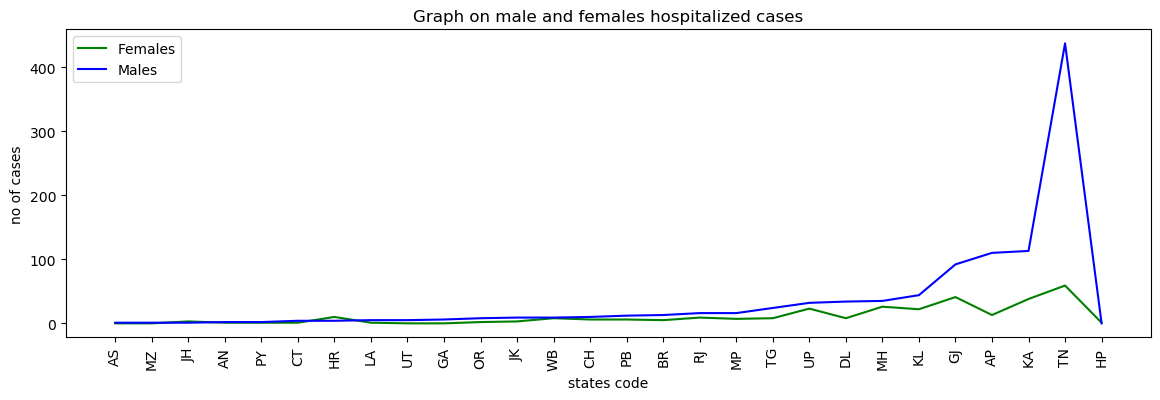

In [235]:
covid191_M_F = pd.merge(left=gen_F,right=gen_M , on='State code',how='outer')
covid191_M_F=covid191_M_F.sort_values(by='Gender_y',ascending=True)
covid191_M_F.fillna(0,inplace=True)
plt.figure(figsize=(14,4))
plt.xticks(range(len(covid191_M_F)), covid191_M_F.index, rotation=90)
plt.xlabel("states code")
plt.ylabel("no of cases")
plt.title('Graph on male and females hospitalized cases')
plt.plot(covid191_M_F['Gender_x'],label="Females",color="green")
plt.plot(covid191_M_F['Gender_y'],label="Males",color="blue")
plt.legend()

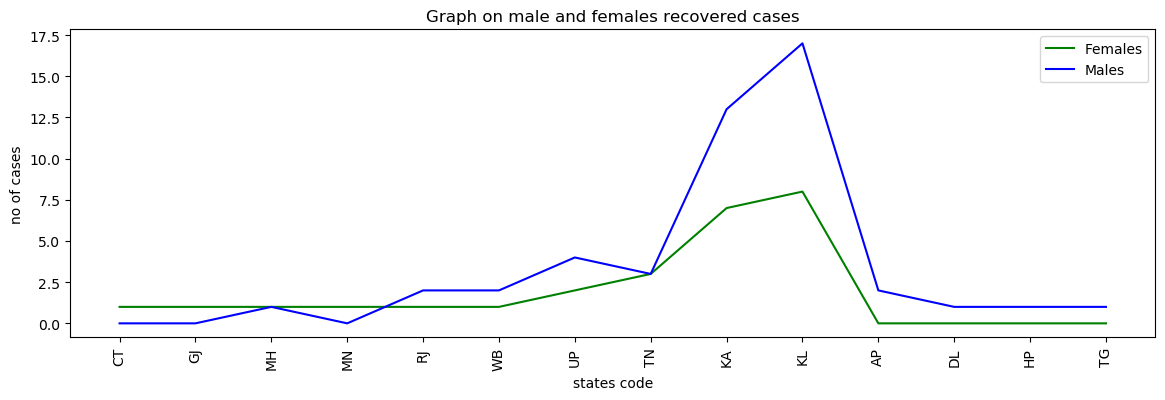

In [169]:
covid191_MR_FR= pd.merge(left=gen_FR,right=gen_MR , on='State code',how='outer')
covid191_MR_FR=covid191_MR_FR.sort_values(by='Gender_x',ascending=True)
covid191_MR_FR.fillna(0,inplace=True)
plt.figure(figsize=(14,4))
plt.xticks(range(len(covid191_MR_FR)), covid191_MR_FR.index, rotation=90)
plt.xlabel("states code")
plt.ylabel("no of cases")
plt.title('Graph on male and females recovered cases')
plt.plot(covid191_MR_FR['Gender_x'],label="Females",color="green")
plt.plot(covid191_MR_FR['Gender_y'],label="Males",color="blue")
plt.legend()

### No of persons categorized by Male and Female affetcted according to age group

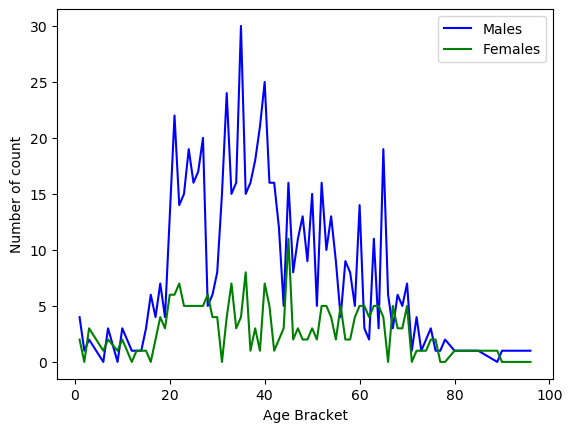

In [234]:
gen_Ml_Fl=corona.pivot_table(index='Age Bracket',columns='Gender',values='State code',aggfunc='count')
gen_Ml_Fl=pd.DataFrame(gen_Ml_Fl)
gen_Ml_Fl.fillna("0",inplace=True)
gen_Ml_Fl=gen_Ml_Fl[0:-1]
plt.xlabel("Age Bracket")
plt.ylabel("Number of count")
plt.plot(gen_Ml_Fl['M'],label='Males',color='blue')
plt.plot(gen_Ml_Fl['F'],label='Females',color='green')
plt.legend()

### Total persons affected according to age group

In [194]:
#gen_Age=corona[['State code','Gender','Age Bracket']][(corona['Gender']=="F")|(corona['Gender']=="M")].groupby(['State code','Age Bracket']).count()
#gen_Age=pd.DataFrame(gen_Age)
gen_Age=corona.pivot_table(index='State code',columns='Age Bracket',values='Gender',aggfunc='count',margins=True)
gen_Age=pd.DataFrame(gen_Age)
gen_Age.fillna("0",inplace=True)
gen_Age

Age Bracket,1,2,3,6,7,9,10,11,12,13,...,78,80,81,85,89,90,92,96,28-35,All
State code,,,,,,,,,,,,,,,,,,,,,
AN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
AP,0,0,0,0,0,0,4,0,0,0,...,0,1,0,0,0,0,0,0,0,122
AS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BR,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,18
CH,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,12
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
DL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,13
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
GJ,1,0,0,0,1,0,0,0,0,0,...,1,0,1,1,0,1,1,0,0,135


In [173]:
gen_Age_C=gen_Age.loc['All'][0:-1]
gen_Age_C

Age Bracket
1        6
2        1
3        5
6        1
7        5
        ..
89       1
90       1
92       1
96       1
28-35    4
Name: All, Length: 83, dtype: object

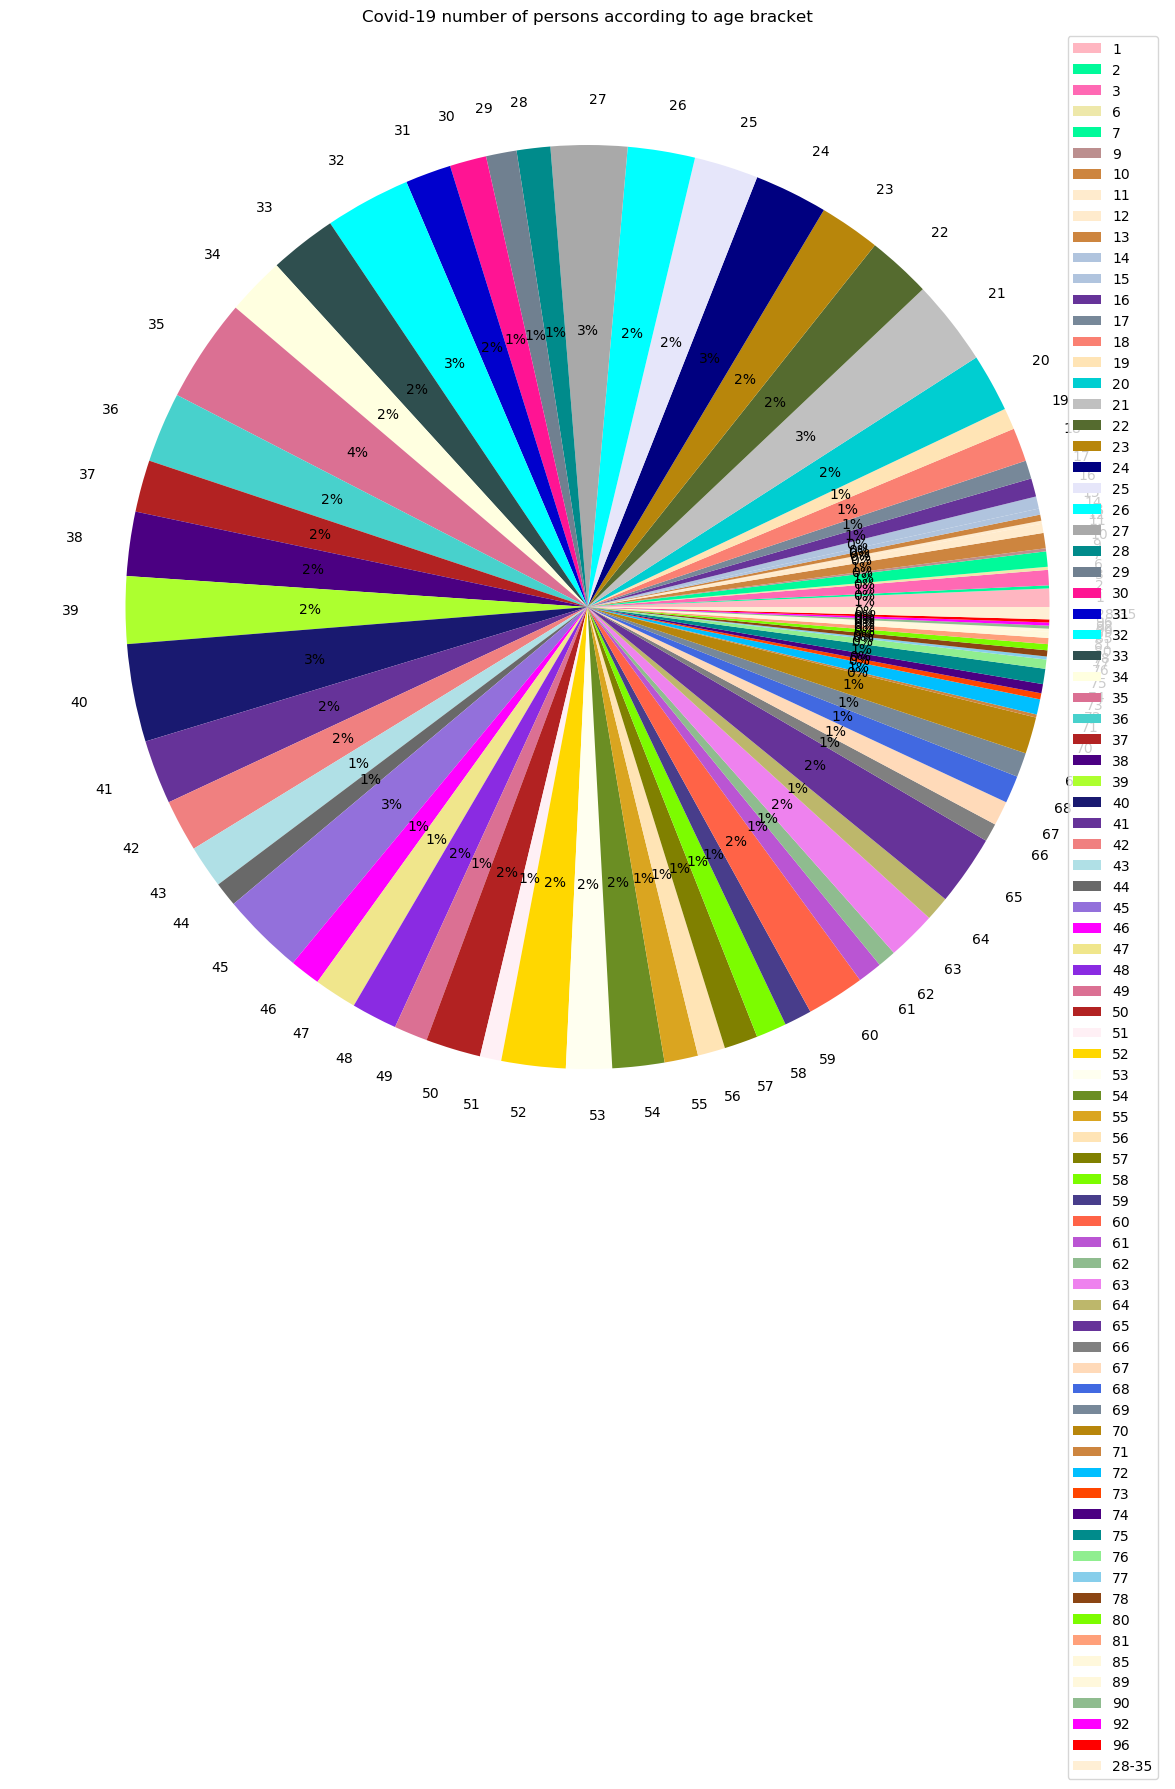

In [162]:
import random
import matplotlib.colors as mcolors
c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(gen_Age_C.index))
plt.figure(figsize=(15,15))
plt.title('Covid-19 number of persons according to age bracket')
plt.pie(gen_Age_C, colors=c,autopct='%.0f%%',labels=gen_Age_C.index)
plt.legend()